In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

100% 86.8M/86.8M [00:05<00:00, 21.0MB/s]
100% 86.8M/86.8M [00:05<00:00, 16.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-tumor-classification-mri.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as plt
from PIL import Image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Training',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Testing',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [ ]:
Class=[]
for file in os.listdir('/content/Training'):
 Class+=[file]
print(Class)
print(len(Class))

['pituitary_tumor', 'no_tumor', 'glioma_tumor', 'meningioma_tumor']
4


In [ ]:
Class=[]
for file in os.listdir('/content/Testing'):
 Class+=[file]
print(Class)
print(len(Class))

['pituitary_tumor', 'no_tumor', 'glioma_tumor', 'meningioma_tumor']
4


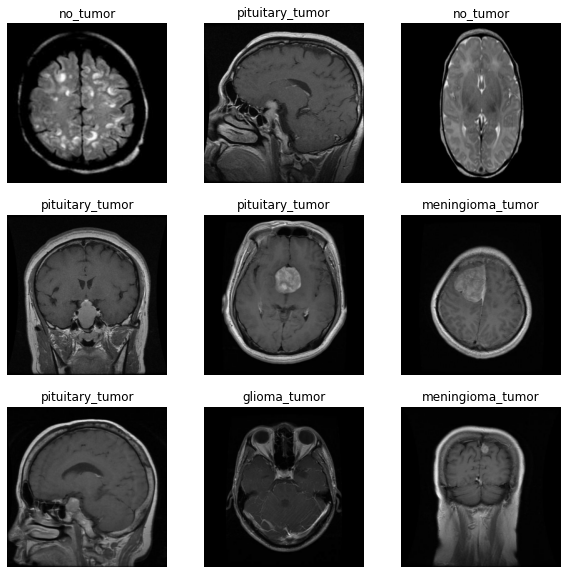

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [ ]:
train_datagen = ImageDataGenerator(
              rescale=1./255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(256,256,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 64)      36928     
                                                        

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
90/90 [==============================] - 50s 380ms/step - loss: 2.6121 - accuracy: 0.4380 - val_loss: 1.6049 - val_accuracy: 0.2030
Epoch 2/10
90/90 [==============================] - 31s 339ms/step - loss: 0.9013 - accuracy: 0.6091 - val_loss: 1.5760 - val_accuracy: 0.3046
Epoch 3/10
90/90 [==============================] - 31s 339ms/step - loss: 0.7620 - accuracy: 0.6742 - val_loss: 1.6339 - val_accuracy: 0.3553
Epoch 4/10
90/90 [==============================] - 31s 336ms/step - loss: 0.6262 - accuracy: 0.7443 - val_loss: 1.6639 - val_accuracy: 0.3579
Epoch 5/10
90/90 [==============================] - 31s 337ms/step - loss: 0.5351 - accuracy: 0.7777 - val_loss: 1.8242 - val_accuracy: 0.3807
Epoch 6/10
90/90 [==============================] - 31s 336ms/step - loss: 0.4713 - accuracy: 0.8063 - val_loss: 1.8876 - val_accuracy: 0.4264
Epoch 7/10
90/90 [==============================] - 31s 336ms/step - loss: 0.3887 - accuracy: 0.8512 - val_loss: 1.6585 - val_accuracy: 0.4822

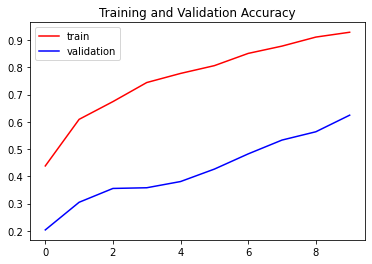

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

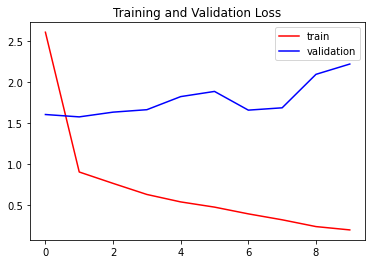

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np

In [ ]:
results = model.evaluate(train_ds, verbose=0)

In [ ]:
print("Test Loss: {:.5f}".format(results[0]))
print("Accuracy on the training set: {:.2f}%".format(results[1] * 100))

Test Loss: 0.17607
Accuracy on the training set: 94.39%


1/1 [==============================] - 0s 120ms/step


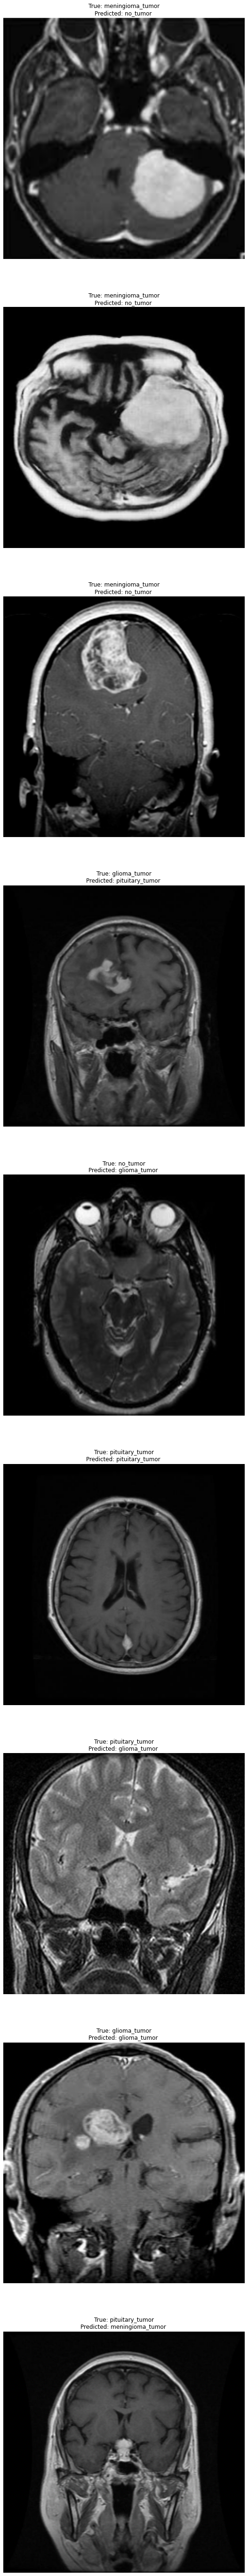

In [ ]:
plt.figure(figsize=(10, 100))
for images, labels in validation_ds.take(1):
    prediction = model.predict(images,batch_size=32)
    for i in range(9):
       ax = plt.subplot(9, 1, i+1)
       pred = np.argmax(prediction[i])
       plt.imshow(images[i].numpy().astype('uint8'))
       true=validation_ds.class_names[labels[i]]
       plt.title(f"True: {true}\nPredicted: { Class[pred] } ")
       plt.axis('off')